<IPython.core.display.Javascript object>


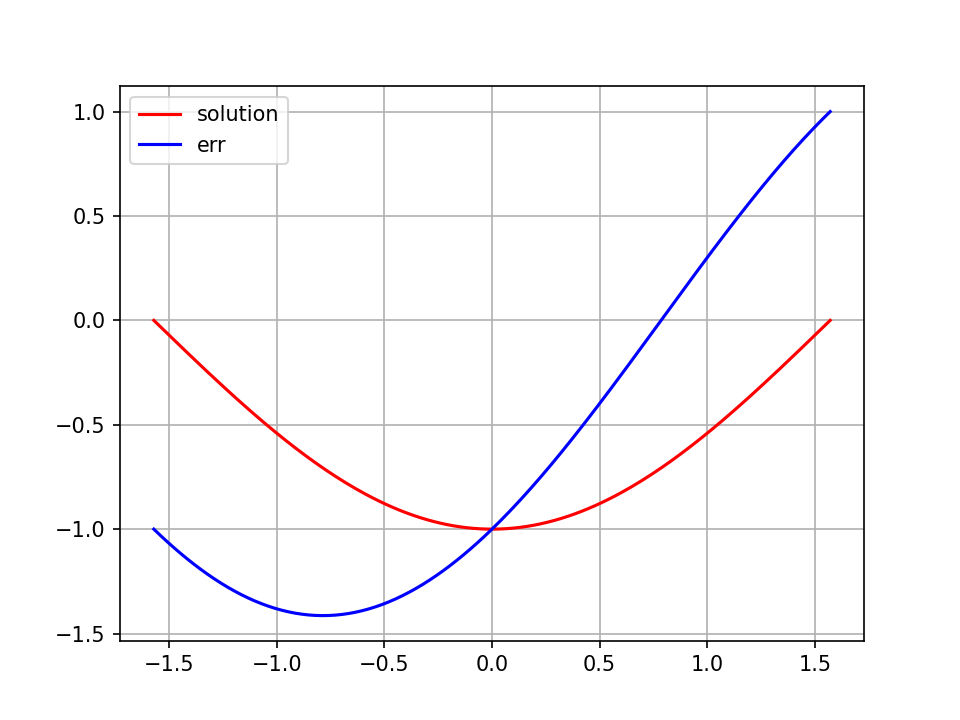

In [17]:
import numpy as np
from matplotlib.pyplot import *
%matplotlib notebook

f = lambda x: np.cos(x)


n = 200
x1 = -np.pi/2
x2 = np.pi/2 
#x2 = 1
x = np.linspace(x1, x2, n+2, True)

#[b c 0 ... 0]   [h**2 * f(x[1])]
#[a b c ... 0]   [h**2 * f(x[2])]
#[0 a c b . 0] = [h**2 * f(x[3])]
#[  ...      ]   [h**2 * f(x[4])] 
#[0 ... 0 a b]   [h**2 * f(x[5])]

a = [0]
for i in range(1, n):
    a.append(1.)

b = []
for i in range(0, n):
    b.append(-2.)
    
c = []
for i in range(0, n-1):
    c.append(1.)
c.append(0.)

h = x[1] - x[0]

# правая часть уравнения (столб) h**2 берем из конечной разницы второго порядка
# пересчет производится с подстановкой значения x в сетке которую ранее задал выше

d = []
for i in range(0, n): 
    d.append(h**2 * f(x[i+1]))

#print (a, b, c)
    
    
def CoefficientMethod(a, b, c, d, n):
    y = []
    for i in range(0, n):
        y.append(0)
 
    for i in range(1, n):
        xi = a[i]/b[i-1]
        a[i] = 0
        b[i] -= xi * c[i-1]
        d[i] -= xi * d[i-1]
       
        #print (a, b, c)
    
    y[n-1] = d[n-1]/b[n-1]    
        
    for i in range(n-2, -1, -1):
        y[i] = 1/b[i] * (d[i] - c[i]*y[i+1])
    
    return y

y = [0] + CoefficientMethod(a, b, c, d, n) + [0]

subplot(111)
ln1, = plot(x, y, 'r-', label = 'solution')
ln2, = plot(x, (y + np.sin(x)), 'b-', label = 'err')
grid()
legend()
gcf().canvas.draw()
        
        

